<a href="https://colab.research.google.com/github/annecdote123/Clinical-Prediction-Model-Using-Neural-Networks/blob/main/Challenging_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (253680, 22)
First 5 rows:
    Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8486 - loss: 0.3482 - val_accuracy: 0.8490 - val_loss: 0.3423
Epoch 2/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8501 - loss: 0.3424 - val_accuracy: 0.8508 - val_loss: 0.3406
Epoch 3/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8521 - loss: 0.3380 - val_accuracy: 0.8518 - val_loss: 0.3394
Epoch 4/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8503 - loss: 0.3413 - val_accuracy: 0.8516 - val_loss: 0.3388
Epoch 5/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8510 - loss: 0.3382 - val_accuracy: 0.8519 - val_loss: 0.3387
Epoch 6/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8518 - loss: 0.3378 - val_accuracy: 0.8519 - val_loss: 0.3388
Epoch 7/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8519 - loss: 0.3382 - val_accuracy: 0.8509 - val_loss: 0.3391
Epoch 8/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8510 - loss: 0.3394 - val

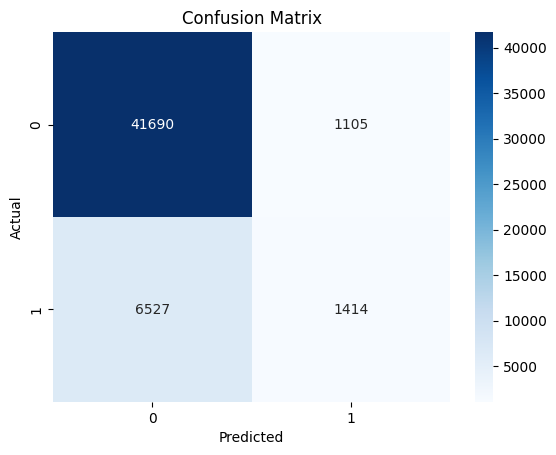

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92     42795
           1       0.56      0.18      0.27      7941

    accuracy                           0.85     50736
   macro avg       0.71      0.58      0.59     50736
weighted avg       0.82      0.85      0.82     50736



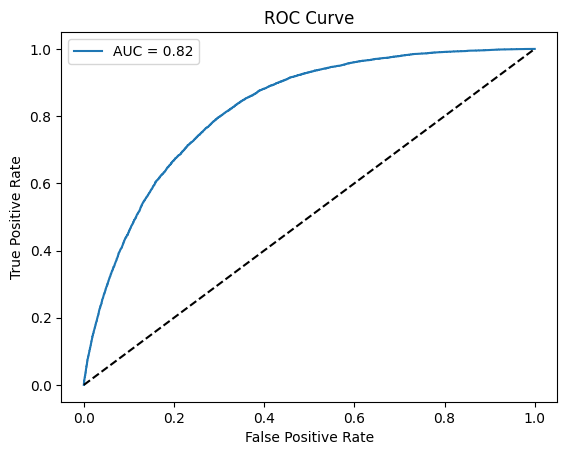


Top Influential Features:
 Age          0.404994
BMI          0.369836
GenHlth      0.360537
HighBP       0.337066
HighChol     0.291114
Sex          0.283061
Smoker       0.274971
CholCheck    0.270209
Income       0.263212
Education    0.251053
dtype: float32


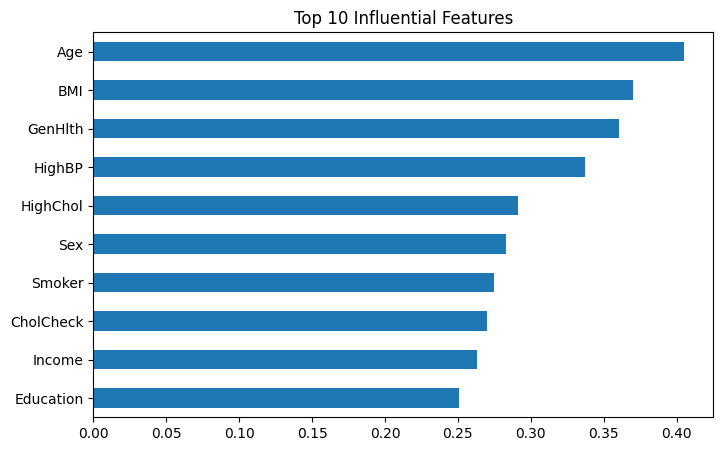

In [1]:
# Step 1: Install & Import Libraries
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Unzip and Load Data
import os
zip_path = '/content/diabetes_012_health_indicators_BRFSS2015.csv.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Load CSV
data = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')

# Step 3: Data Exploration
print("Dataset shape:", data.shape)
print("First 5 rows:\n", data.head())
print("Class distribution:\n", data['Diabetes_012'].value_counts())

# Step 4: Preprocessing
# Convert multi-class 'Diabetes_012' into binary classification (0 = No Diabetes, 1 = Diabetes)
data['Diabetes_binary'] = data['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns='Diabetes_012', inplace=True)

# Split features and labels
X = data.drop(columns='Diabetes_binary')
y = data['Diabetes_binary']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Step 6: Evaluation
# Accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 7: Feature Importance Analysis (using weights from first layer)
input_weights = model.layers[0].get_weights()[0]
mean_weights = np.mean(np.abs(input_weights), axis=1)
feature_importance = pd.Series(mean_weights, index=data.columns[:-1]).sort_values(ascending=False)
print("\nTop Influential Features:\n", feature_importance.head(10))
feature_importance.head(10).plot(kind='barh', title='Top 10 Influential Features', figsize=(8,5))
plt.gca().invert_yaxis()
plt.show()
